# **Real or Not? NLP with Disaster Tweets** 

Predict which Tweets are about real disasters and which ones are not.

## **IMPORTACIÓN LIBRERÍAS Y REVISIÓN DATOS**


In [0]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

import spacy # spaCy is a leading NLP library when working with text.
nlp = spacy.load("en_core_web_sm") # Loading English Language Model
from spacy import lemmatizer

In [0]:
# Importación librerías para preprocesamiento 
import re  #Regular expression operations = RE

In [0]:
# Cargar datos conjunto de entrenamiento
up_data = files.upload()

Saving train.csv to train.csv


In [0]:
data = pd.read_csv(io.BytesIO(up_data['train.csv']))
pd.set_option('display.max_colwidth',-1)
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [0]:
data = data.drop(columns= ['id', 'keyword', 'location'], axis=1)
data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,"13,000 people receive #wildfires evacuation orders in California",1
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


#**Modelos con texto virgen**

En está parte analizaremos los modelos de regresión logística, máquinas de soporte vectorial (SVM) y árboles de decisión (RandomForest Classifier), todos estos, ya que, nuestro problema consiste en determinar si un tweet corresponde a un desastre o no (problema de clasificación). Para los modelos emplearemos tres formas de hacer **embedding** los cuales son:



1.   Bag of words
2.   TF-IDF
3.   Tensorflow hub



In [0]:
# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split #Partición de los datos
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, plot_roc_curve, f1_score # Métricas


1.   **Bag of words**



In [0]:
from sklearn.feature_extraction.text import CountVectorizer # BOW

v_1 = CountVectorizer()
X_B_1 = v_1.fit_transform(data['text']) # Crea la matriz de frecuencias y selecciona las características por defecto crea una matriz sparse
X_B_1 = X_B_1.toarray()
print(50*'-')
print(50*'-')
print('El número de características es: {}'.format(X_B_1.shape[1]))
print('El número de datos es: {}'.format(X_B_1.shape[0]))
print(50*'-')
print(50*'-')

--------------------------------------------------
--------------------------------------------------
El número de características es: 21637
El número de datos es: 7613
--------------------------------------------------
--------------------------------------------------


In [0]:
# Partición de los datos 
x_e_B1, x_p_B1, y_e_B1, y_p_B1 = train_test_split(X_B_1, data['target'], test_size=0.2)
# x_e_B1 = X del entrenamiento
# x_p_B1 = X de prueba
# y_e_B1 = Y de entrenamiento
# y_p_B1 = Y de prueba

**Regresión Logística**

In [0]:
# Ajustamos
model_1 = LogisticRegression(max_iter=500)
model_1.fit(x_e_B1, y_e_B1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

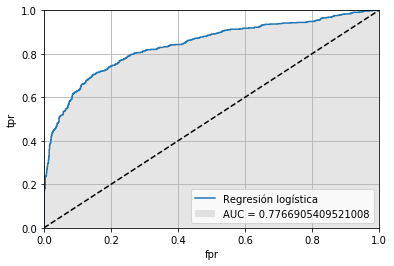

In [0]:
# Graficamos curva roc
y_srl = model_1.predict_proba(x_p_B1)[:,1]
fpr, tpr, thresholds = roc_curve(y_p_B1, y_srl)
plt.axis([0,1,0,1])
plt.grid()
plt.plot([0, 1], [0, 1], '--k')
plt.plot(fpr, tpr, label='Regresión logística')
plt.fill_between(fpr, tpr, facecolor='grey', alpha=0.2, label= 'AUC = {}'.format(roc_auc_score(y_p_B1, model_1.predict(x_p_B1))))
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()

In [0]:
# Metrica F1
print(40*'-')
print(40*'-')
print('La metrica F1 es: {}'.format(f1_score(y_p_B1,model_1.predict(x_p_B1))))
print(40*'-')
print(40*'-')

----------------------------------------
----------------------------------------
La metrica F1 es: 0.7410358565737052
----------------------------------------
----------------------------------------


In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/Factored project/"

Modelos


**Máquinas de soporte vectorial**

In [0]:
model_2 = SVC()
model_2.fit(x_e_B1, y_e_B1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# Guardamos el modelo
from sklearn.externals import joblib

#save the file in the current directory
joblib_file_model_2_BOW = "/content/drive/My Drive/Factored project/Modelos/joblib_model_2_BOW.pkl"
joblib.dump(model_2, joblib_file_model_2_BOW)

['/content/drive/My Drive/Factored project/Modelos/joblib_model_2_BOW.pkl']

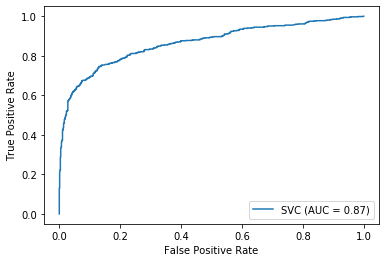

In [0]:
# Graficamos curva ROC 
plot_roc_curve(model_2, x_p_B1, y_p_B1)

In [0]:
# Metrica F1
print(40*'-')
print(40*'-')
print('La metrica F1 es: {}'.format(f1_score(y_p_B1,model_2.predict(x_p_B1))))
print(40*'-')
print(40*'-')

----------------------------------------
----------------------------------------
La metrica F1 es: 0.7603027754415476
----------------------------------------
----------------------------------------


**Árboles de decisión**

In [0]:
# Laura te corresponde jugar con el número de árboles (n_estimators=100), creo que el modelo se puede mejorar
model_3 = RandomForestClassifier(n_estimators=100)
model_3.fit(x_e_B1, y_e_B1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

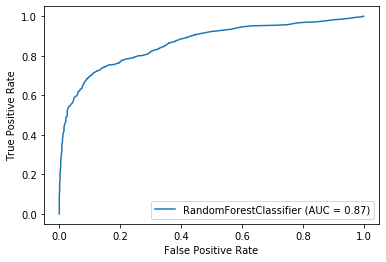

In [0]:
# Graficamos curva ROC 
plot_roc_curve(model_3, x_p_B1, y_p_B1)

In [0]:
# Metrica F1
print(40*'-')
print(40*'-')
print('La metrica F1 es: {}'.format(f1_score(y_p_B1,model_3.predict(x_p_B1))))
print(40*'-')
print(40*'-')

----------------------------------------
----------------------------------------


NameError: ignored

2. **TF-IDF**

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
v_2 = TfidfVectorizer()
X_T_1 = v_2.fit_transform(data['text'])
X_T_1 = X_T_1.toarray()
print(50*'-')
print(50*'-')
print('El número de características es: {}'.format(X_T_1.shape[1]))
print('El número de datos es: {}'.format(X_T_1.shape[0]))
print(50*'-')
print(50*'-')


--------------------------------------------------
--------------------------------------------------
El número de características es: 21637
El número de datos es: 7613
--------------------------------------------------
--------------------------------------------------


In [0]:
# Partición de los datos
x_e_T1, x_p_T1, y_e_T1, y_p_T1 = train_test_split(X_T_1, data['target'], test_size=0.2)

**Regresión logística**

In [0]:
# modelo
model_1.fit(x_e_T1, y_e_T1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

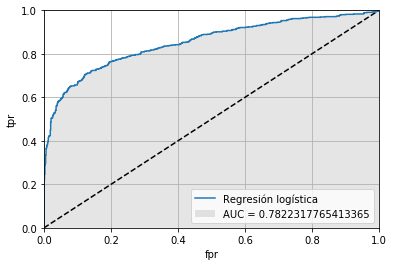

In [0]:
#curvas ROC 
y_srl = model_1.predict_proba(x_p_T1)[:,1]
fpr, tpr, thresholds = roc_curve(y_p_T1, y_srl)
plt.axis([0,1,0,1])
plt.grid()
plt.plot([0, 1], [0, 1], '--k')
plt.plot(fpr, tpr, label='Regresión logística')
plt.fill_between(fpr, tpr, facecolor='grey', alpha=0.2, label= 'AUC = {}'.format(roc_auc_score(y_p_T1, model_1.predict(x_p_T1))))
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()

In [0]:
# Metrica F1
print(40*'-')
print(40*'-')
print('La metrica F1 es: {}'.format(f1_score(y_p_T1,model_1.predict(x_p_T1))))
print(40*'-')
print(40*'-')

----------------------------------------
----------------------------------------
La metrica F1 es: 0.7389078498293515
----------------------------------------
----------------------------------------


**Máquinas de soporte vectorial**

In [0]:
# Acá Johan
# modelo
model_2.fit(x_e_T1, y_e_T1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

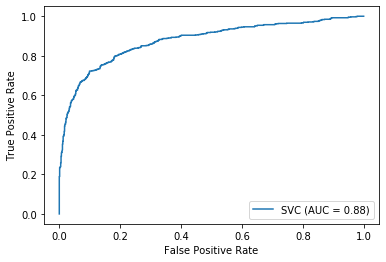

In [0]:
# curva ROC 
plot_roc_curve(model_2, x_p_T1, y_p_T1)

In [0]:
# Metrica F1
print(40*'-')
print(40*'-')
print('La metrica F1 es: {}'.format(f1_score(y_p_T1,model_2.predict(x_p_T1))))
print(40*'-')
print(40*'-')

----------------------------------------
----------------------------------------
La metrica F1 es: 0.7493403693931399
----------------------------------------
----------------------------------------


**Árboles de decisión**

In [0]:
#Acá Laura 

3. **Tensorflow hub**

# **ELIMINACIÓN DEL RUIDO DE TEXTO**


In [0]:
# CREACIÓN DE NUEVO DATAFRAME PARA NO MANIPULAR EL ORIGINAL
# ADICIONALMENTE, CREO NUEVA COLUMNA PARA NO MODIFICAR LA COLUMNA 'TEXT 
# Y GUARDAR LOS DATOS MODIFICADOS EN LA TERCERA
newdata = pd.DataFrame(columns=('text', 'target','NoRuido'))
pd.set_option('display.max_colwidth',-1)
newdata['text']=data['text']
newdata['target']=data['target']

**ELIMINAR URL'S DE LOS TWEETS**

In [0]:
# FUNCIÓN PARA ELIMINAR URL'S DE LOS TWEETS
# Fuente:  https://www.kaggle.com/shahules/basic-eda-cleaning-and-glove

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [0]:
newdata['NoRuido']=newdata['text'].apply(lambda x : remove_URL(x))  

**REMOVING HTML TAGS**

In [0]:
# Fuente:  https://www.kaggle.com/shahules/basic-eda-cleaning-and-glove

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [0]:
newdata['NoRuido']=newdata['NoRuido'].apply(lambda x : remove_html(x)) 

**REMOVING EMOJIS**

In [0]:
# Fuente:  https://www.kaggle.com/shahules/basic-eda-cleaning-and-glove
# Fuente: https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [0]:
newdata['NoRuido']=newdata['NoRuido'].apply(lambda x: remove_emoji(x))
print(newdata.head(35))

                                                                                                                                     text  ...                                                                                                                                NoRuido
0   Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all                                                                  ...  Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all                                                                
1   Forest fire near La Ronge Sask. Canada                                                                                                 ...  Forest fire near La Ronge Sask. Canada                                                                                               
2   All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected  ...  All residents asked to

# **Modelos para el texto sin ruido**

Aplicamos de nuevo los tres métodos de embedding:

- Bag of Words
- TF-IDF
- Tensorflow hub

# **AVISO IMPORTANTE**

*EN ADELANTE SE USARÁ LA COLUMNA  newdata['NoRuido'] 

Debido a qué ya tiene filtrada información NO deseada de los Tweets 

In [0]:
# BOW

# v_1 = CountVectorizer()
X_B_2 = v_1.fit_transform(newdata['NoRuido']) # Crea la matriz de frecuencias y selecciona las características por defecto crea una matriz sparse
X_B_2 = X_B_2.toarray()
print(50*'-')
print(50*'-')
print('El número de características es: {}'.format(X_B_2.shape[1]))
print('El número de datos es: {}'.format(X_B_2.shape[0]))
print(50*'-')
print(50*'-')

--------------------------------------------------
--------------------------------------------------
El número de características es: 17034
El número de datos es: 7613
--------------------------------------------------
--------------------------------------------------


In [0]:
# Particionamos los datos
x_e_B2, x_p_B2, y_e_B2, y_p_B2 = train_test_split(X_B_2, newdata['target'], test_size=0.2)

**Regresión Logística**

In [0]:
## modelo
model_1.fit(x_e_B2, y_e_B2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

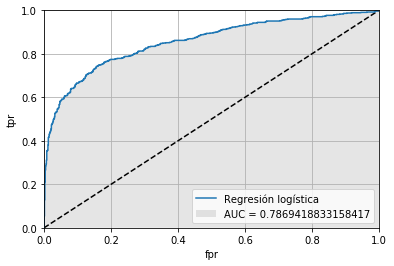

In [0]:
## curvas ROC 
y_srl = model_1.predict_proba(x_p_B2)[:,1]
fpr, tpr, thresholds = roc_curve(y_p_B2, y_srl)
plt.axis([0,1,0,1])
plt.grid()
plt.plot([0, 1], [0, 1], '--k')
plt.plot(fpr, tpr, label='Regresión logística')
plt.fill_between(fpr, tpr, facecolor='grey', alpha=0.2, label= 'AUC = {}'.format(roc_auc_score(y_p_B2, model_1.predict(x_p_B2))))
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()

In [0]:
# Metrica F1
print(40*'-')
print(40*'-')
print('La metrica F1 es: {}'.format(f1_score(y_p_B2,model_1.predict(x_p_B2))))
print(40*'-')
print(40*'-')

----------------------------------------
----------------------------------------
La metrica F1 es: 0.7508090614886731
----------------------------------------
----------------------------------------


**Máquinas de soporte vectorial**

In [0]:
model_2.fit(x_e_B2, y_e_B2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
f1_score(y_p_B2,model_2.predict(x_p_B2))

0.7352682497801232

In [0]:
joblib_file_model_2_BOW_NoRuido = 

In [0]:
print(newdata.columns)
# type()

Index(['text', 'target', 'NoRuido'], dtype='object')


In [0]:
for token in nlp(data.text[0]):
  # print(token, token.lemma_, token.is_stop)
  if (token.is_stop==True):
    nlp(data.text[0]).re

Our -PRON-
Deeds deed
are be
the the
Reason Reason
of of
this this
# #
earthquake earthquake
May May
ALLAH ALLAH
Forgive forgive
us -PRON-
all all
